In [34]:
from IPython.display import Image
Image(url='https://vesg.ipsl.upmc.fr/thredds/fileServer/IPSLFS/jservon/CliMAF_Notebooks_html/CliMAF-logo-small.png') 

### A science-oriented framework to ease the analysis of climate model simulations
##### WP5 ANR Convergence
##### Project leaders: Stéphane Sénési (CNRM-GAME), Jérôme Servonnat (LSCE-IPSL)
##### Developers: Ludivine Vignon (CNRM-GAME), Laurent Franchisteguy (CNRM-GAME), Patrick Brockmann (LSCE-IPSL), Sylvana Ramos-Buarque (CNRM-GAME)
##### Beta-testing: Olivier Marti (LSCE-IPSL), Marie-Pierre Moine (CERFACS), Emilia Sanchez-Gomez (CERFACS)
##### Contributors: you!
##   
##### contact: climaf@meteo.fr

The goals of CliMAF are to provide the scientists with simplified and science-oriented means for :
- accessing both model and references data
- pre-tretament (period and geographical selections, regridding, averaging like seasonal mean computations...)
- plotting  maps, cross-sections and time series
- building  atlases
- plugging personal scripts in an atlas or in an analysis workflow
- sharing such scripts
- handlling ensembles (multi-model, multi-realization)
CliMAF provides full managment of the outputs by handling the naming of the output files; it also stores the information on "how I obtained this file" under the form of an expression called CRS (CliMAF Reference Syntax) that allows checking for the existing files and avoid recomputing the same files twice (or more).

#  
#   

# CliMAF in a nutshell: quick overview of what CliMAF is about 

How we:
- find and work on a dataset
- compute simple pretreatments (compute a climatology, select a period, a domain, do a bias map...)
- plot a field and customize the plot
- make a multiplot

#  

## First, import climaf

In [1]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_1.2.13_beta
python => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /prodigfs/ipslfs/dods/jservon/miniconda/envs/analyse_env_2.7/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_1.2.13_beta/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


### And set verbosity ('critical' -> minimum ; 'debug' -> maximum)

In [2]:
clog('critical') # min verbosity = critical < warning < info < debug = max verbosity

### ... and dont' forget to open the documentation in case you have questions.
### http://climaf.readthedocs.org/
### -> Use the "Quick search" space to search for what you are interested in, it is really powerfull!
###  

## We want a CMIP5 simulation
### ds() = searching for the data in a science-oriented logic

In [3]:
# -- We use ds() to get the dataset
dat_cmip5 = ds(project='CMIP5',
               model='CNRM-CM5',
               variable='tos',
               experiment='historical',
               period='1980-2000',
               frequency='monthly',
               realization='r1i1p1',
               version='latest'
               )
summary(dat_cmip5)
# -- summary() gives the list of files found by ds() and the pairs 'facets':'values' associated with the request
# -> The user can then refine the request to select only one file

/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_198001-198912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_199001-199912.nc
/bdd/CMIP5/output/CNRM-CERFACS/CNRM-CM5/historical/mon/ocean/Omon/r1i1p1/latest/tos/tos_Omon_CNRM-CM5_historical_r1i1p1_200001-200512.nc


{'domain': 'global',
 'experiment': 'historical',
 'frequency': 'monthly',
 'model': 'CNRM-CM5',
 'period': 1980-2000,
 'project': 'CMIP5',
 'realization': 'r1i1p1',
 'realm': '*',
 'root': '/bdd',
 'simulation': '',
 'table': '*',
 'variable': 'tos',
 'version': 'latest'}

## At this stage, dat_cmip5 is only a python object. CliMAF does not load data in memory.

In [4]:
dat_cmip5

ds('CMIP5%%tos%1980-2000%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest')

## This object carries an identifier called the CRS (CliMAF Reference Syntax): the sequence of operations applied to the dataset retrieved by ds()

In [5]:
dat_cmip5.crs

"ds('CMIP5%%tos%1980-2000%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest')"

## If I want to get the result of this data request, I use cfile() to return the netcdf file:
## CliMAF automatically provides a unique name to the output based on a hash of the CRS

In [6]:
cfile(dat_cmip5)

'/data/jservon/climafcache/9e/0a6c79777423d2c59afd5d37909bdcff6fd222f9d60b47f8c0cd81.nc'

## But I can also provide an explicit name for my output (and use ln=True to do a link; see cfile() in CliMAF documentation)

In [7]:
cfile(dat_cmip5, target='myfile.nc', ln=True)

'/home/jservon/Evaluation/CliMAF/climaf_installs/climaf_gr_V1.2.13/examples/myfile.nc'

## Note: If you want to see what are the other projects (data archives) already available, use projects()

In [8]:
projects()

-- Available projects:
-- Project: CORDEX
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${model}%${CORDEX_domain}%${model_version}%${frequency}%${driving_model}%${realization}%${experiment}%${version}%${institute}
-- Project: CORDEX_extent
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${model}%${CORDEX_domain}%${model_version}%${frequency}%${driving_model}%${realization}%${experiment}%${extent_experiment}%${version}%${institute}
-- Project: IGCM_OUT
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${login}%${model}%${status}%${experiment}%${DIR}%${OUT}%${ave_length}%${frequency}%${clim_period}%${clim_period_length}
-- Project: CMIP6_extent
Facets => ${project}%${simulation}%${variable}%${period}%${domain}%${root}%${model}%${institute}%${mip}%${table}%${experiment}%${extent_experiment}%${realization}%${grid}%${version}
-- Project: file
Facets => ${project}|${simulation}|${variable}|${period}|${domain}|${

### Tip: Need to check the content? ncdump

In [7]:
ncdump(dat_cmip5)

netcdf \0a6c79777423d2c59afd5d37909bdcff6fd222f9d60b47f8c0cd81 {
dimensions:
	time = UNLIMITED ; // (252 currently)
	bnds = 2 ;
	i = 362 ;
	j = 292 ;
	vertices = 4 ;
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:bounds = "time_bnds" ;
		time:units = "days since 1850-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	double time_bnds(time, bnds) ;
	float lon(j, i) ;
		lon:standard_name = "longitude" ;
		lon:long_name = "longitude coordinate" ;
		lon:units = "degrees_east" ;
		lon:_CoordinateAxisType = "Lon" ;
		lon:bounds = "lon_bnds" ;
	float lon_bnds(j, i, vertices) ;
	float lat(j, i) ;
		lat:standard_name = "latitude" ;
		lat:long_name = "latitude coordinate" ;
		lat:units = "degrees_north" ;
		lat:_CoordinateAxisType = "Lat" ;
		lat:bounds = "lat_bnds" ;
	float lat_bnds(j, i, vertices) ;
	int i(i) ;
		i:standard_name = "projection_x_coordinate" ;
		i:long_name = "cell index along first dimension" ;
		i:units = 

ncdump(ds('CMIP5%%tos%1980-2000%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest'))

### Tip: Use ncview() to see the result

In [10]:
ncview(dat_cmip5)

ncview(ds('CMIP5%%tos%1980-2000%global%/bdd%CNRM-CM5%*%historical%r1i1p1%monthly%*%latest'))

#####  

## We might also need a reference (here a pre-computed climatology)...

In [8]:
obs = ds(project='ref_climatos',
         variable='tos',
         product='WOA13-v2',
         clim_period='195501-201212',
        ).explore('resolve')
summary(obs)

/data/jservon/Evaluation/ReferenceDatasets/climatos/ocn/mo/tos/WOA13-v2/ac/tos_Omon_WOA13-v2_observations_195501-201212-clim.nc


{'clim_period': '195501-201212',
 'domain': 'global',
 'frequency': 'annual_cycle',
 'obs_type': 'observations',
 'period': fx,
 'product': 'WOA13-v2',
 'project': 'ref_climatos',
 'simulation': 'refproduct',
 'table': 'Omon',
 'variable': 'tos'}

## ...to compute a bias map

In [9]:
# -- Compute the climatologies
clim_cmip5 = clim_average(dat_cmip5,'ANM')
clim_obs = clim_average(obs,'ANM')

# -- Then, the bias map
rgrd_dat = regrid(clim_cmip5,clim_obs)
clim_bias = minus(rgrd_dat,clim_obs)

# You also have: clim_bias = diff_regrid(clim_cmip5,clim_obs)

## And here is the bias map.

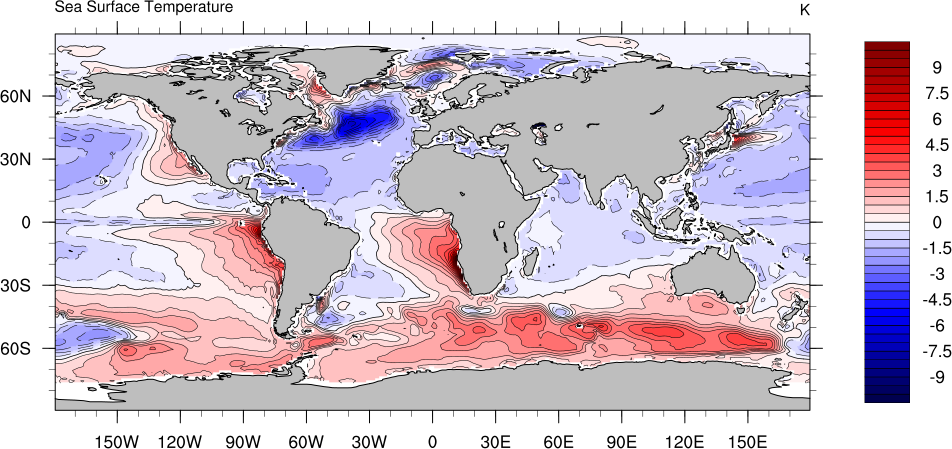

In [10]:
map = plot(clim_bias,title='', min=-10, max=10, delta=0.5, color='MPL_seismic', focus='ocean', contours=1
          )
# --> a map that you can easily customize.
iplot(map)

## Have a look at the CliMAF documentation on plot to see all the possibilities

## http://climaf.readthedocs.org/en/dev/scripts/plot.html?highlight=plot

#  

## Now I want two seasons: JFM and JAS

## First, I compute the bias for JFM...

In [11]:
JFM_cmip5 = clim_average(dat_cmip5,'JFM')
JFM_obs = clim_average(obs,'JFM')

bias_JFM = diff_regrid(JFM_cmip5,JFM_obs)

## ...then for JAS...

In [12]:
JAS_cmip5 = clim_average(dat_cmip5,'JAS')
JAS_obs = clim_average(obs,'JAS')

bias_JAS = diff_regrid(JAS_cmip5,JAS_obs)

## -- Python tip: use a dictionnary to pass multiple argument to a function --

In [13]:
plotting_specs = dict(min=-8, max=8, delta=1, contours=1,
                      focus='ocean', color='temp_diff_18lev')

## -- use it for multiple plots, here JFM and JAS bias maps

In [14]:
JFM_map = plot(bias_JFM, title='JFM bias', **plotting_specs)
JAS_map = plot(bias_JAS, title='JAS bias', **plotting_specs)

## ... and do the multiplot

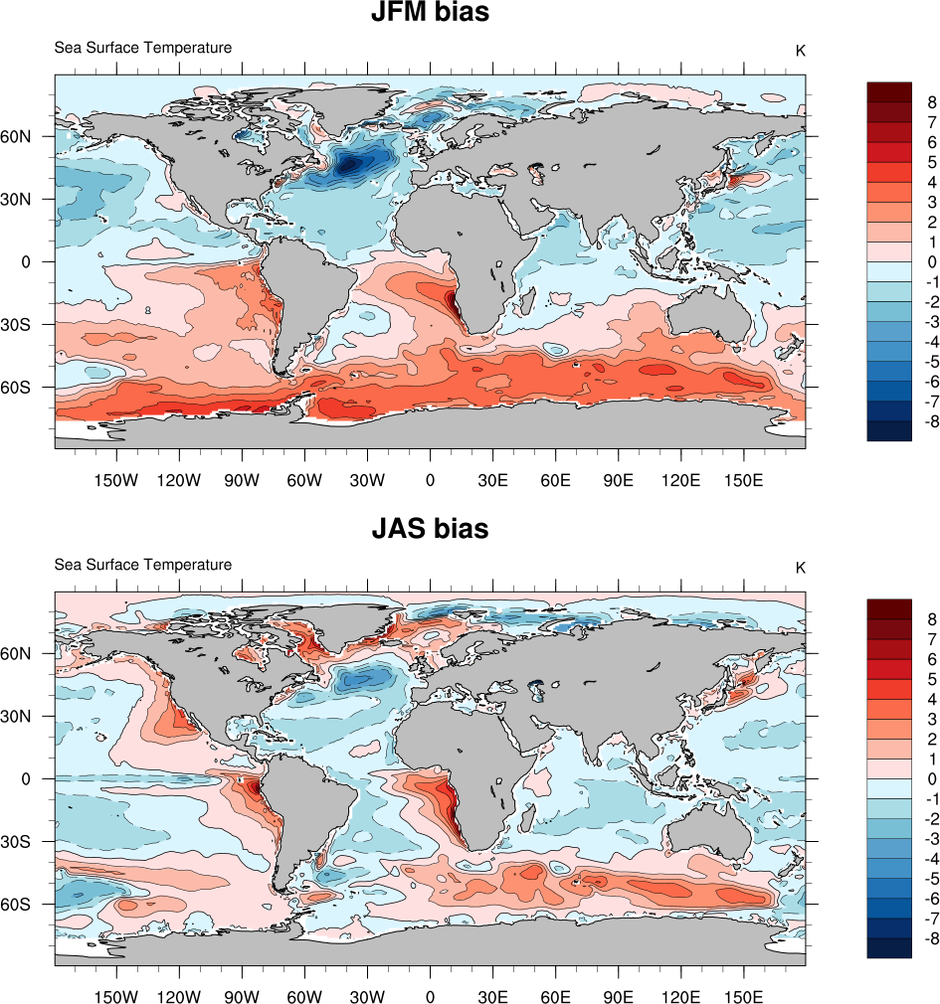

In [15]:
multiplot = cpage(fig_lines = [[JFM_map],[JAS_map]])

iplot(multiplot)

## This was CliMAF in a nutshell!
##  
##  
## -> go back to the other examples to see more on data access, how to work with ensembles, build an html page...
##  